# Propedéutico de Python

Importamos algunas bibliotecas para trabajar:

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

## Numpy y Matplotlib

Para ejemplificar el uso de `numpy` y `matplotlib` haremos un ejercicio pequeño donde simulemos el movimiento Browniano.

Sabemos que el movimiento Browniano está caracterizado en sus desplazamientos por una distribución Gaussiana o normal con media cero y varianza $2 D \Delta t$, con $D$ siendo el coeficiente de difusión y $\Delta t$ el tiempo entre cada paso del caminante aleatorio.

Para realizar la simulación realizaremos una dinámica Browniana, es decir, a partir de la ecuación de Langevin, a saber en una dimensión

$$
m \frac{d^2 x(t)}{d t^2} = -\gamma v(t) + \xi(t) + F_{ext},
$$

donde $F_{ext}(t)$ son las fuerzas externas sobre el sistema, $\gamma$ es el coeficiente de fricción, $m$ es la masa de la partícula, $v(t)$ su velocidad y $\xi(t)$ es una fuerza de naturaleza puramente aleatoria, producto de las colisiones de las partículas que constituyen al medio.

Para obtener la expresión de la dinámica Browniana debemos considerar que nos encontramos en el régimen sobreamortiguado, es decir

$$
|\gamma v(t)| = \left|\gamma \frac{d x(t)}{d t}\right| >> \left|m \frac{d^2 x(t)}{d t^2}\right|.
$$

> ...aquí va mucho más explicación...

La ecuación discretizada para la dinámica Browniana queda como

$$
x_{n+1} = x_n + \sqrt{2D\Delta t} \; \eta(t) + \beta \; D \; \Delta t \; F_{ext} (t),
$$ 

con $x_{n+1}$ la posición siguiente de la partícula, $x_n$ la posición previa, $\eta(t)$ un número aleatorio distribuido de manera normal estándar, $\eta(t) ~ N(0,1)$, y $\beta$ la constante de Boltzmann.

Para fines de nuestra simulación tomaremos $D=1$, $\beta = 1$, $\Delta t = 10^{-4}$.

### Simulación 2D

Como el movimiento Browniano bidimensional presenta independencia entre ambas componentes dimensionales, podemos tomar un par de ecuaciones discretizadas independientes, además los coeficientes de difusión en cada dirección los tomamos iguales entre sí, $D_x = D_y = 1$, es decir, asumimos un espacio isotrópico, y las componentes aleatorias también son independientes. Esto es

$$
x_{n+1} = x_n + \sqrt{2D_x\Delta t} \; \eta_x(t) + \beta \; D_x \; \Delta t \; F_{x,ext} (t),
$$

$$
y_{n+1} = y_n + \sqrt{2D_y \Delta t} \; \eta_y(t) + \beta \; D_y \; \Delta t \; F_{y,ext} (t).
$$

In [2]:
# Declaramos constantes útiles

# Número de pasos en la simulación
steps = 1000
# Paso temporal
dt = 1e-4
# Coeficiente de difusión (del bulto)
d0 = 1.0
# Constante de Boltzmann
beta = 1.0
# Media de la distribución normal
mu = 0.0
# Desviación estándar de la N
sigma = (2 * d0 * dt) ** 0.5
# Fuerzas externas
f_x = 0.0
f_y = 0.0

# Generamos *steps* números aleatorios para x
eta_x = np.random.normal(mu, sigma, steps)

# Generamos *steps* números aleatorios para y
eta_y = np.random.normal(mu, sigma, steps)

Podemos generar un histograma para cada componente de los números aleatorios:

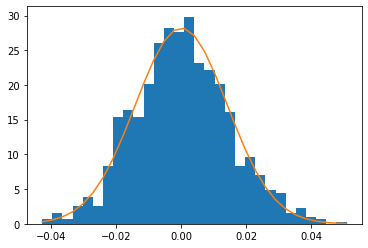

In [3]:
# Histograma para los aleatorios en X
n, bins, patches = plt.hist(eta_x, 30, density=True)

# Ajustamos la distribución
y = ( ( 1.0 / (np.sqrt(2.0 * np.pi) * sigma) ) * np.exp(-0.5 * ( 1.0 / sigma * (bins - mu) ) ** 2) )

# Graficamos el ajuste
plt.plot(bins, y)
plt.show()

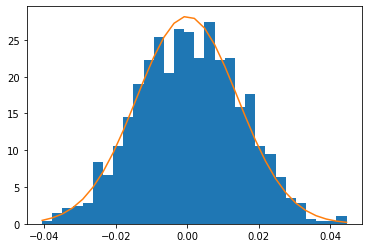

In [4]:
# Histograma para los aleatorios en Y
n, bins, patches = plt.hist(eta_y, 30, density=True)

# Ajustamos la distribución
y = ( ( 1.0 / (np.sqrt(2.0 * np.pi) * sigma) ) * np.exp(-0.5 * ( 1.0 / sigma * (bins - mu) ) ** 2) )

# Graficamos el ajuste
plt.plot(bins, y)
plt.show()

Ahora corremos la simulación como tal y guardamos los datos para poder visualizarlos posteriormente.

In [5]:
# Establecemos el origen en (0,0)
xs = np.array([0.0])
ys = np.array([0.0])

for step in range(steps):
  xs = np.append(xs, xs[-1] + np.sqrt(2.0 * d0 * dt) * eta_x[step] + beta * d0 * dt * f_x )

  ys = np.append(ys, ys[-1] + np.sqrt(2.0 * d0 * dt) * eta_y[step] + beta * d0 * dt * f_y )

Graficamos ahora la trayectoria 2D del caminante aleatorio.

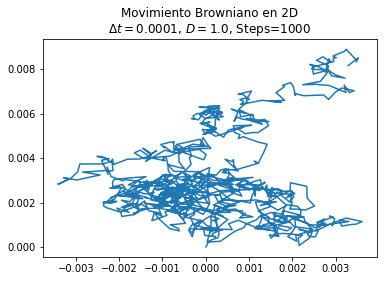

In [6]:
plt.plot(xs, ys)

# Activamos TeX
plt.rcParams['text.usetex'] = True

plt.title(f'Movimiento Browniano en 2D\n$\Delta t={dt}$, $D={d0}$, Steps=${steps}$')
plt.show()

## Pandas & más

Usemos `pandas` para un análisis básico. Usaremos información almacenada en un archivo `CSV`, que en este caso se trata de la información de una aseguradora.

Usaremos un par de bibliotecas más, `seaborn` para graficar de manera más simple algunas cosas y `statsmodels` para analizar la información.

In [7]:
# Importamos las bibliotecas extras
import seaborn as sns
import statsmodels.formula.api as smf

In [8]:
# Leemos la información en un DataFrame
df = pd.read_csv('insurance.csv')

In [9]:
# Exploramos la información
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [10]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [11]:
# Filtramos a los asegurados fumadores
fumadores = df[ df['smoker'] == 'yes' ]

In [12]:
# Creamos un modelo para relacionar el índice
# de masa corporal (bmi) y el costo del
# del seguro (charges) de los fumadores.
modelo = smf.ols('charges ~ bmi', data=fumadores)

# Ajustamos el modelo
fit = modelo.fit()

In [13]:
# Mostramos la información del ajuste
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                charges   R-squared:                       0.650
Model:                            OLS   Adj. R-squared:                  0.649
Method:                 Least Squares   F-statistic:                     506.1
Date:                Sun, 04 Sep 2022   Prob (F-statistic):           5.02e-64
Time:                        22:04:03   Log-Likelihood:                -2807.2
No. Observations:                 274   AIC:                             5618.
Df Residuals:                     272   BIC:                             5626.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1.319e+04   2052.885     -6.423      0.000   -1.72e+04   -9145.013
bmi         1473.1063     65.484     22.496      0.000    1344.187    1602.026
==============================================================================
Omnibus:                       24.771   Durbin-Watson:                   1.878
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               38.639
Skew:                           0.568   Prob(JB):                     4.07e-09
Kurtosis:                       4.447   Cond. No.                         156.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<AxesSubplot:xlabel='bmi', ylabel='charges'>

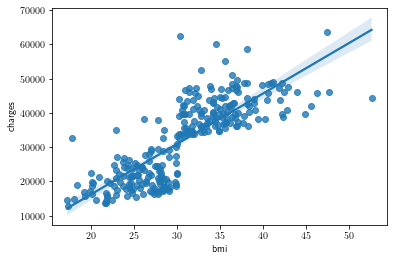

In [14]:
# El ajuste no es muy bueno, apenas una
# R^2 de 0.650.
# Aún así, usamos `regplot` de `seaborn` para 
# graficar y que ajuste automáticamente un modelo
# de regresión.
# Notemos que `seaborn` no nos da información
# del modelo ajustado, lo usamos únicamente
# para visualizar.
sns.regplot(x=fumadores['bmi'], y=fumadores['charges'])

Ahora usemos los datos del ajuste de `statsmodels` para _intentar predecir_ cuánto pagaría una persona fumadora basándonos únicamente en su *bmi*. Los datos los copiamos de la información obtenida de `fit.summary()`.

In [15]:
pago_fumador = lambda bmi: 1473.1063 * bmi - 1.319e+4

Grafiquemos ahora con `matplotlib`. Generemos la figura y los ejes.

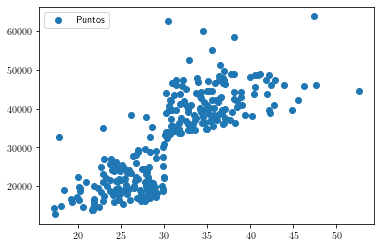

In [16]:
fig,ax = plt.subplots()

# Realizamos una gráfica de dispersión (scatter)
ax.scatter(fumadores['bmi'], fumadores['charges'], label='Puntos')
ax.legend(labels=['Puntos'])

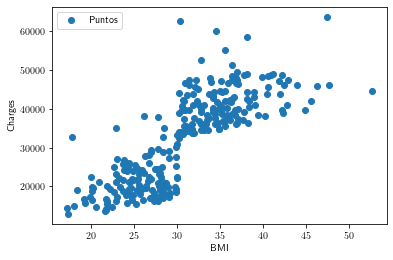

In [17]:
# Ponemos etiquetas a los ejes
ax.set_xlabel('BMI')
ax.set_ylabel('Charges')

# Visualizamos
fig

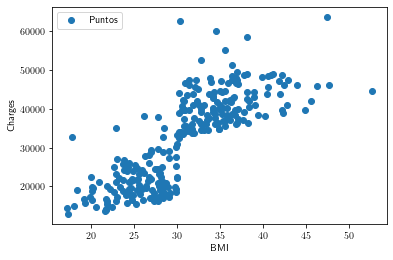

In [18]:
# Añadimos fondo blanco fuera de los ejes
fig.set_facecolor('white')
fig

Graficamos la recta de predicción $charges ~ bmi$

Para graficar necesitamos los puntos a partir de la recta que tenemos caracterizada en la función `pago_fumador`.

Primero usaremos la función `linspace()` de `numpy` para generar números espaciados de manera uniforme entre dos números. El número de puntos serán tantos como especifiquemos.

In [19]:
xinicio = np.min(fumadores['bmi'])
xfin = np.max(fumadores['bmi'])

# Generamos 100 puntos
xf = np.linspace(xinicio, xfin, 100)

In [20]:
# Para generar las _y_'s de nuestra gráfica
# usamos iteradores y «fromiter()» de numpy
# como alternativa a un ciclo tradicional de Python
iter = (pago_fumador(x) for x in xf)
yf = np.fromiter(iter, float)

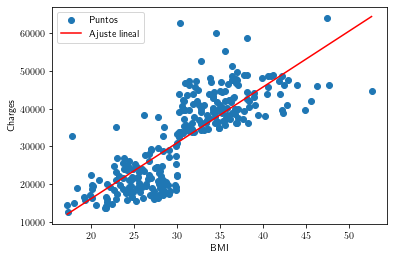

In [21]:
# Graficamos el ajuste
ax.plot(xf, yf, label='Ajuste lineal', color='red')

# Agregamos la leyenda
ax.legend()

# Mostramos
fig

### Pequeño ejemplo de clasificación

Usaremos el método `KMeans`, el cual ya viene implementado dentro del paquete `SciKitLearn`.

Buscamos definir ciertos grupos y etiquetarlos. `Kmeans` en particular, utiliza en el fondo la solución de un problema de optimización numérica.

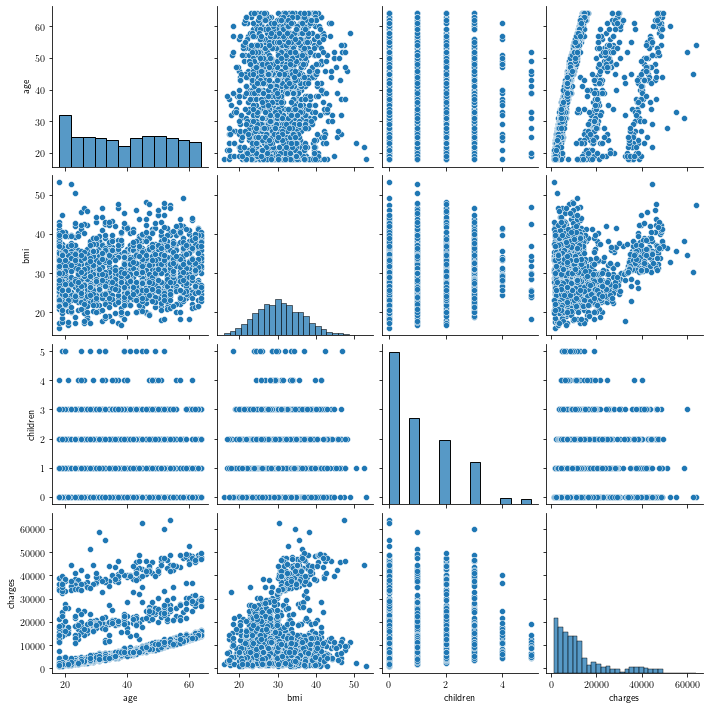

In [22]:
# Observemos primero los datos con la ayuda
# de «pairplot()» de «seaborn»
sns.pairplot(df)

La gráfica de _charges_ vs _age_ se nota particularmente atractiva para el ejercicio de clasificación, notemos que intuitivamente podemos localizar tres grupos.

<AxesSubplot:xlabel='age', ylabel='charges'>

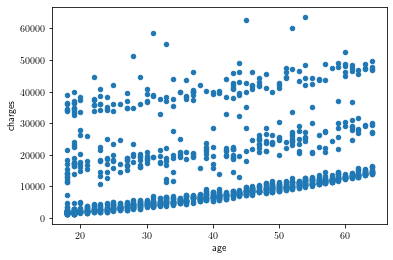

In [23]:
df.plot.scatter(x='age', y='charges')

In [24]:
# Importemos el método KMeans
from sklearn.cluster import KMeans

In [25]:
# Necesitamos indicar cuántos clusters
# o grupos deseamos identificar. De nuestro
# análisis exploratorio, localizamos tres.
km = KMeans(n_clusters=3)

In [26]:
# Y ajustamos el modelo sobre «age» y «charges»
km.fit( df[['age', 'charges']] )

KMeans(n_clusters=3)

In [27]:
# Obtenemos centroides y etiquetas
# Recordemos que se trata de aprendizaje
# no supervizado.
centroides = km.cluster_centers_
etiquetas = km.labels_

In [28]:
# Observamos cuántas etiquetas (grupos)
# tenemos (sabemos de antemano que son 3)
etiquetas

array([2, 0, 0, ..., 0, 0, 1], dtype=int32)

In [29]:
# ¡Ups! Usamos «numpy» para visualizar mejor
np.unique(etiquetas)

array([0, 1, 2], dtype=int32)

In [30]:
# Por mera conveniencia tomamos sólo las 
# columnas usadas para la clasificación.
xkm = df[['age', 'charges']]
xkm.head()

,age,charges
0,19,16884.92400
1,18,1725.55230
2,28,4449.46200
3,33,21984.47061
4,32,3866.85520


In [31]:
# Generamos un DataFrame nuevo
# agregando una columna extra con la etiqueta
# proveniente del modelo de clasificación.
xkm = xkm.assign(tipo=etiquetas)
xkm.head()

,age,charges,tipo
0,19,16884.92400,2
1,18,1725.55230,0
2,28,4449.46200,0
3,33,21984.47061,2
4,32,3866.85520,0


In [32]:
# Filtramos por etiquetas para generar conjuntos
# de datos y graficarlos.
# (podemos hacerlo con ciclos & stuff)
t0 = xkm[ xkm['tipo'] == 0 ]
t1 = xkm[ xkm['tipo'] == 1 ]
t2 = xkm[ xkm['tipo'] == 2 ]

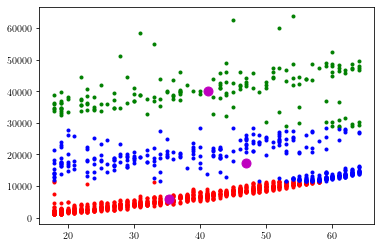

In [33]:
# Graficamos los 3 grupos con PyPlot

# Graficamos el tipo 0 en rojo
# r. es notación de Matlab
plt.plot(t0['age'], t0['charges'], 'r.')

# Y lo mismo para los grupos restantes
plt.plot(t1['age'], t1['charges'], 'g.')
plt.plot(t2['age'], t2['charges'], 'b.')

# Y graficamos los centroides
plt.plot(centroides[:,0], centroides[:,1], 'mo', markersize=9)